# Feature Analysis

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
top_ten = ['sd', 'b', 'sv', 'aa', '%', 'ba', 'qy', 'x', 'ny', 'fc']

## Load Features

In [4]:
text = pd.read_csv('../features/train_text_features.csv', index_col=0)
speech = pd.read_csv('../features/train_speech_features.csv', index_col=0)

## Text-Based Features

Test whether LIWC feature `tentat` or the phrase `i don't know` is more useful in predicting the dialogue act `Hedge`

In [36]:
# Get the transcripts

train = pd.read_csv('../data/train.csv')
train = train[['dialog_id', 'speaker', 'start_time', 'end_time', 'transcript']]
text = text.merge(right=train, how='left', on= ['dialog_id', 'speaker', 'start_time', 'end_time'])

In [47]:
def get_frequencies(phrase, feature):
    total_feature_count = 0
    total_phrase_count = 0

    feature_counts = {}
    phrase_counts = {}
    
    # Initialize the counts
    for da in top_ten:
        feature_counts[da] = 0
        phrase_counts[da] = 0

    # Obtain the counts.
    for row, item in text.iterrows():
        da_tag = item['da_tag']
         
        if item[feature] > 0:
            total_feature_count += 1

            if da_tag in top_ten:
                feature_counts[da_tag] += 1
        
        if phrase in item['transcript']:
            total_phrase_count += 1

            if da_tag in top_ten:
                phrase_counts[da_tag] += 1  
            
    # Normalize the dictionaries.
    norm_feature_counts = {k: v / total_feature_count for k, v in feature_counts.items()}
    norm_phrase_counts = {k: v / total_phrase_count for k, v in phrase_counts.items()}
    
    # Plot
    bar_width = 0.25

    br1 = np.arange(len(ten_largest_das))
    br2 = [x + bar_width for x in br1]

    plt.bar(br1, norm_feature_counts.values(), color ='b', width = bar_width, label = feature)
    plt.bar(br2, norm_phrase_counts.values(), color ='g', width = bar_width, label = phrase)

    plt.xticks(br2, ten_largest_das)
    plt.xlabel('Dialogue Act')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized Frequencies of the \'{}\' Feature and \n Phrase \"{}\" For Each Dialogue Act'.format(feature, phrase))

    plt.legend()
    plt.show()

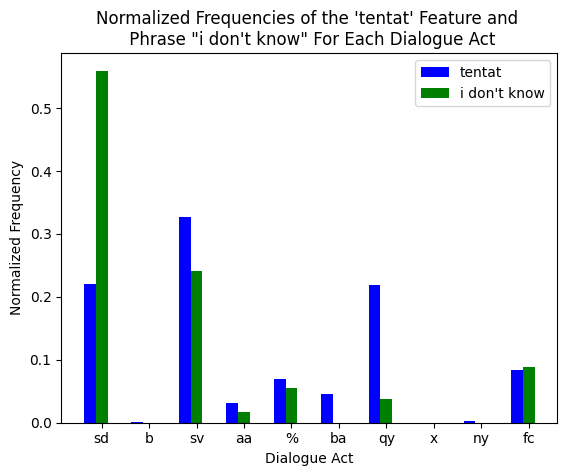

In [48]:
get_frequencies('i don\'t know', 'tentat')

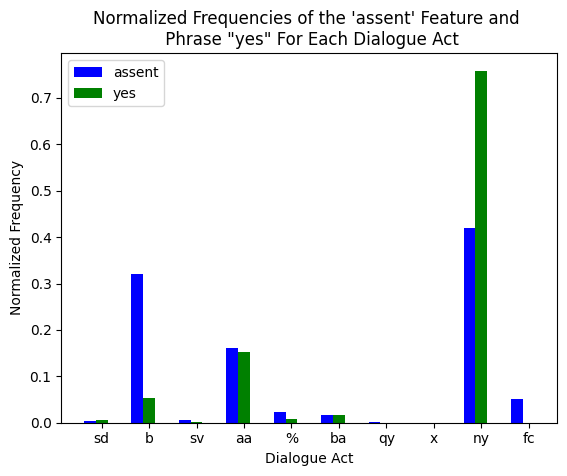

In [49]:
get_frequencies('yes', 'assent')

## Speech-Based Features